# Introduction
The goal of this notebook is to demonstrate how to use pandas to explore data produced by Siegfried. In order to follow along, you should be familiar with Jupyter notebooks, PRONOM ID, Python, and pandas. This notebook includes some redundant steps in order to introduce different pandas idioms that are useful to know when running your own analysis.

The code in this notebook should be able to handle any CSV export from Siegfried, although your results may be different.

Let's get started

In [206]:
# Load libraries needed for analysis
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [222]:
# Load the siegfried dataset and print a summary of all columns.

df = pd.read_csv('sf.csv')
df.describe(include='all')

,filename,filesize,modified,errors,namespace,id,format,version,mime,basis,warning
count,142952,1.429520e+05,142767,1268,142767,142767,131977,101360,126788,131977,29292
unique,142952,NaN,100482,196,1,224,167,88,64,66415,73
top,/mnt/digarch/faComponents/M23015/M23015_ER_4/o...,NaN,2013-05-27T20:11:32Z,empty source,pronom,fmt/40,JPEG File Interchange Format,97-2003,image/jpeg,extension match doc; container name CompObj wi...,extension mismatch
freq,1,NaN,413,1073,142767,17266,25940,18969,51818,8834,16109
mean,NaN,2.545253e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,4.320847e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,3.094300e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,3.454310e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2.648543e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Analysing PRONOM IDs and Formats
With the data loaded, one of the first things we can do is counting how many different formats were identified in the scan. The dataset contains two columns with format information. 'id' has the PRONOM ID of each file, and 'format' has a more general format name for each file.

In [291]:
# How many pronom IDs were found?

## If a column name doesn't have any spaces or periods, you can reference it as df.column_name.
## Otherwise, you can use df['column_name'].
len(df.id.unique())

225

In [288]:
# How many files were found for each pronom ID? And let's only see the top 10.

## You can chain together pandas functions, if the output of one is accepted as input for the next.
## value_counts() produces a series, head() shows the first x rows of any series or dataframe.
df.id.value_counts().head(10)

fmt/40       17266
fmt/44       15807
UNKNOWN      10790
fmt/645      10685
fmt/353       9524
fmt/43        9117
x-fmt/391     7908
fmt/18        7453
x-fmt/92      6694
fmt/41        5733
Name: id, dtype: int64

In [289]:
# How about something human-readable, like format names?

df.format.value_counts().head(10)

JPEG File Interchange Format                   25940
Exchangeable Image File Format (Compressed)    20144
Microsoft Word Document                        19949
Tagged Image File Format                        9524
Acrobat PDF 1.4 - Portable Document Format      7453
Adobe Photoshop                                 6694
Raw JPEG Stream                                 5733
Microsoft Word for Windows                      4470
Acrobat PDF 1.3 - Portable Document Format      3863
WordPerfect for MS-DOS/Windows Document         2249
Name: format, dtype: int64

Because multiple PRONOM ID can share the same format name, the counts don't line up exactly between the 'id' and 'format' columns. For example, PRONOM ID fmt/42, fmt/43, and fmt/44 are all signatures for 'JPEG File Interchange Format'. Each of those signatures matches a different version of the format (1.00, 1.01, and 1.02 respectively).

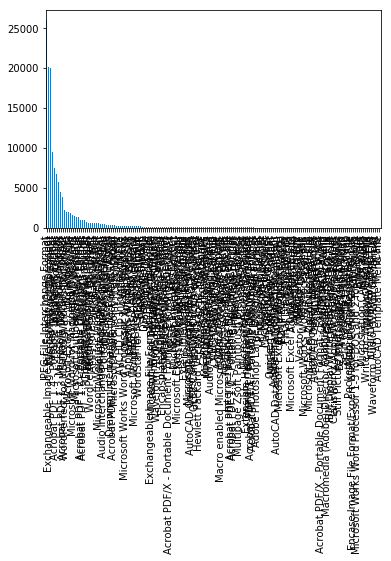

In [36]:
# What does it look like when we visualize the format counts?

df.format.value_counts().plot(kind='bar')

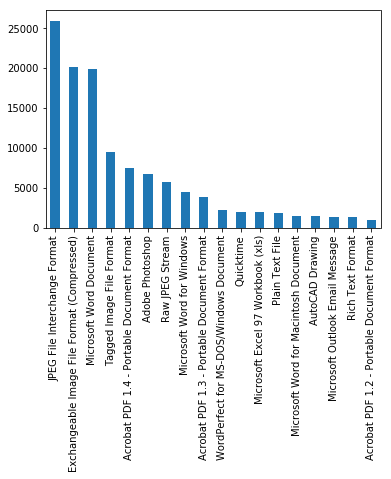

In [292]:
# That's not very useful, so let's just look at formats with more than a thousand files found.

## To filter data in the middle of a chain of commands in pandas, you have to use a lambda function.
## You also have to explicitly delete the rows that don't meet the lambda filter criteria with dropna().
df.format.value_counts().where(lambda x : x > 1000).dropna().plot(kind='bar')

## If you can't get a lambda function to work, 
## you can also save the output of the chain to a variable and do a boolean filter.
## The boolean filter only produces files that meet the criteria, so you don't have to dropna().
## For example: 
## format_counts = df.format.value_counts()
## format_counts[format_counts > 1000].plot(kind='bar')

Format names can be useful for analysis, but they are not the same as the PRONOM IDs. Anything with an 'UNKNOWN' ID does not receive a format. This is often a very large number of files. Creating new PRONOM signatures or improving existing PRONOM signatures in order to identify these files would be useful for your collection and for the community at large.

In [38]:
# Count the number of not-empty values in each column

df.count()

filename     142952
filesize     142952
modified     142767
errors         1268
namespace    142767
id           142767
format       131977
version      101360
mime         126788
basis        131977
warning       29292
dtype: int64

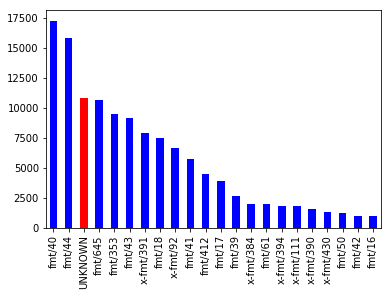

In [143]:
# Visualize the difference in a graph

pronom_ids = df.id.value_counts().where(lambda x : x > 1000).dropna()

## This is kind of complicated, but it's how we're customizing the colors on the bar graph.
## We create a list of colors for each item in the filtered count,
## and then change the color for the data we're interested in.
colors = ['blue'] * len(pronom_ids)
colors[pronom_ids.index.get_loc('UNKNOWN')] = 'red'

pronom_ids.plot(kind='bar', color=colors)

## That workaround is not great, but there are other, more intuitive plotting libraries like plot.ly and seaborn.

## Analyzing Errors and Warnings

The 'id' and 'format' columns are not the only interesting columns in the dataset. 'errors' is useful to find any problems that were encountered while running Siegfried. 'warnings' is useful to give more context about less than perfect format identifications.

### Errors

In [211]:
# Count the different kinds of errors.

## The error messages are often specific to the filename, so value_counts() is not as useful.
df.errors.value_counts().head()

empty source                                                                                                                                                                                                                       1073
failed to identify /mnt/digarch/faComponents/M23135/M23135_ER_29/objects/J-?.7.jpg: stat /mnt/digarch/faComponents/M23135/M23135_ER_29/objects/J-?.7.jpg: no such file or directory                                                   1
mscfb: illegal sector size; 8201                                                                                                                                                                                                      1
failed to identify /mnt/digarch/faComponents/M23347/M23347_ER_49/objects/NYCB TV mag : stat /mnt/digarch/faComponents/M23347/M23347_ER_49/objects/NYCB TV mag : no such file or directory                                             1
failed to identify /mnt/digarch/faComponents/M23211/M23211_ER_47/objects

In [226]:
## To get around that, we can extract the stem error message with regular expressions.
## The replace() function can take a dictionary where each key is the matching expression and
## and the value is the replacing expression.
## Both can use regular expressions.
error_normalization= {
    r'^(mscfb:[\sa-z]+)(\s\(|;).*': r'\1',
    r'(failed to identify).*:\s([\sa-z]+)\s.*:\s([\sa-z]+)$': r'\1: \2: \3'
}

## Save the results as a new column in case they're useful for later analysis.
df['errors_agg'] = df.errors.replace(error_normalization, regex = True)
df.errors_agg.value_counts()

empty source                                           1073
failed to identify: stat: no such file or directory     184
mscfb: directory entries read error                       4
mscfb: setting mini stream                                2
mscfb: traversal counter overflow                         2
mscfb: illegal sector size                                1
mscfb: directory entries sector cycle                     1
failed to identify: stat: invalid argument                1
Name: errors_agg, dtype: int64

There are a few classes of error.

* 'empty source' means that the file contains 0 bytes of data. This may indicate a corrupted storage system.
* 'failed to identify...' means that there was an error with what siegfried expected to process and what it found. This may indicate a corrupted storage system, an invalid file, or other problems.
* 'mscfb:...' are errors while trying to read Microsoft Compound File Binary files (e.g. .doc files). This may indicate an invalid file.

Depending on your curation decisions and preservation policy, you may want to investigate some or all of these errors.

In [231]:
# Extract the 'failed to identify' and 'empty source' errors, and save the data to a new csv.

## ~ reverses the results, so the second expression is true for cells that do not contain 'mscfb'
## Because contains does not evaluate cells with NA values, we need to explicity fail those with na=False
df[(df.errors_agg.notnull()) & ~(df.errors_agg.str.contains('mscfb', na=False))].to_csv('files_to_check.csv')

## If you wanted to get real fancy, you could use a single boolean filter, like:
## df[~(df.errors_agg.str.contains('mscfb', na=True))]
## but it helps to be verbose with your logic, so that you understand the code six months from now.

### Warnings
Warnings are created when Siegfried can suggest a match, but it's not based on a byte signature. Format matches with warnings may be incorrect.

In [235]:
# Normalize the warning messages.

## In this case, we just need to normalize warnings about multiple possible extension matches.
warn_normalization= {
    r'.*possibilities.*': 'multiple matches based on extension only'
}

df['warning_agg'] = df.warning.replace(warn_normalization, regex = True)
df.warning_agg.value_counts()

extension mismatch                          16109
no match                                     6556
multiple matches based on extension only     4234
match on text only; extension mismatch       1537
match on extension only                       856
Name: warning_agg, dtype: int64

For warnings, we have the following categories.

* `extension mismatch`, when the extension does not match the extension expected based on the internal signature. (e.g. a pdf file with .mp3)
* `no match`, when the file cannot be identified based on an internal signature or extension (
* `multiple matches`, when a file cannot be identified based on an internal signature and the extension is ambiguous, (e.g. .doc)
* `match on text only; extension mismatch`, when the extension does not match the extension expected based on the text contents of a file. (e.g. an html file with a .txt)
* `match on extension only`, when the file cannot be identified based on an internal signature but has an unambiguous extension. (e.g. .pptx is only used for PowerPoint files)

We can dig in a bit farther to see the most common causes of warnings. Since many of these warnings are based on extensions, we'll need to extract extensions from the filenames.

In [285]:
# Extract extensions and save to a column.

## '\.([a-z0-9_]+)$' is a naive pattern to find extensions.
## Any number of lower-case letter, numbers, and underscores between a period and the end of the filename.
## It could be improved.
df['extension'] = df.filename.str.extract(r'\.([a-z0-9_]+)$', expand = False)

In [286]:
# Find the most common mismatched extensions.

df[(df.warning_agg == 'extension mismatch')].extension.value_counts().head()

aif     246
txt     211
aiff    141
jpeg     88
x32      68
Name: extension, dtype: int64

In [287]:
# Examine a specific commonly mismatched extension, like txt.

df[(df.warning_agg == 'extension mismatch') & (df.extension == 'txt')].format.value_counts()

Hypertext Markup Language                  154
MIME Email                                  50
PostScript                                   4
Adobe Illustrator                            2
WordPerfect for MS-DOS/Windows Document      1
Name: format, dtype: int64

In [276]:
# Find the most common ambiguous extensions with files that haven't been matched by signatures.

df[(df.warning_agg == 'multiple matches based on extension only')].extension.value_counts().head(10)

vwx    1575
mcd     687
psd     299
jpg     275
pdf      45
doc      43
dwg      34
rtf      28
eml      21
xls      18
Name: extension, dtype: int64

In [294]:
# Find the most common extension mismatches with files that have been matched on text content.

## It's useful to see both the format name and the extension, but value_counts only works on one series of data.
## To get a similar output, we use:
## groupby(['column1', 'column2', ...]).size().sort_values(ascending=False)
df[(df.warning_agg == 'match on text only; extension mismatch')].groupby(['format', 'extension']).size().sort_values(ascending=False).head(10)

format           extension
Plain Text File  2            44
                 1            26
                 3            25
                 4            17
                 5            11
                 maxpat        9
                 6             8
                 mss           7
                 com           6
                 7             6
dtype: int64

In [271]:
# Find the most common formats matched by extension, but not internal signature.

df[(df.warning_agg == 'match on extension only')].groupby(['format', 'extension']).size().sort_values(ascending=False)

format                                     extension
Raw Bitmap                                 raw          169
Back Up File                               bak           24
Comma Separated Values                     csv           17
JavaScript file                            js            12
Cascading Style Sheet                      css            5
AutoCAD Database File Locking Information  dwl            4
Generic Library File                       lib            2
Adobe Illustrator                          ai             2
Microstation CAD Drawing                   dgn            1
Information or Setup File                  inf            1
Binary File                                bin            1
dtype: int64

Depending on your data, it should be fairly clear that extensions are relatively inaccurate ways to identify data. Some users don't add or delete extensions. Some users add the wrong extension. Some extensions have been used by multiple formats. Even if the extension match is accurate, it would be useful to have a more secure match based on an internal signature. If we're reanalyzing all 'UNKNOWN' IDs, we should probably also reanalyze any match based on extension.

However, we should also check to see how warnings and errors are correlated.

In [299]:
# Going back to the error messages, we can see what errors still receive format identifications.

df[df.errors_agg.notnull() & df.warning_agg.notnull()].groupby(['errors_agg', 'warning_agg']).size()

errors_agg    warning_agg                             
empty source  match on extension only                      28
              multiple matches based on extension only    982
              no match                                     63
dtype: int64

All of the 'empty source' errors have deeper issues, so it wouldn't be useful to include them in a deeper file analysis.

In [ ]:
# Extract all the uncertain matches from the dataset (but not those with errors) and save to a new csv.

df[((df.id == 'UNKNOWN') |
   ((df.warning_agg.notnull()) & (df.warning_agg != 'extension mismatch'))) &
   (df.errors_agg.isnull())].to_csv('unidentified.csv')

Now we have a smaller dataset that just contains the least known files.